In [1]:
import os, glob, shutil
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
#import seaborn as sns

from tqdm import tqdm

import skimage
from skimage.io import imread , imsave, imread_collection 

from sklearn.metrics import accuracy_score , classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.applications import mobilenet
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


In [78]:
# total patients number
img_path ='data_origin/*/'
patient_list = list(glob.glob(img_path))
print(f'Number of the patient: {len(patient_list)}')

Number of the patient: 279


In [79]:
patient_list[0]

'data_origin\\10253\\'

In [80]:
# total image numbers
sum = 0
for i in range(len(patient_list)):
    sum += len(glob.glob(patient_list[i]+'/*/*'))
print(sum)

277524


In [81]:
img_list=[glob.glob(patient_list[i]+'/*/*') for i in range(len(patient_list))]

In [82]:
len(img_list)

279

In [83]:
img_list[0][0]

'data_origin\\10253\\0\\10253_idx5_x1001_y1001_class0.png'

In [84]:
t = img_list[0][0].split('\\')
t

['data_origin', '10253', '0', '10253_idx5_x1001_y1001_class0.png']

In [85]:
img_list[0][0]

'data_origin\\10253\\0\\10253_idx5_x1001_y1001_class0.png'

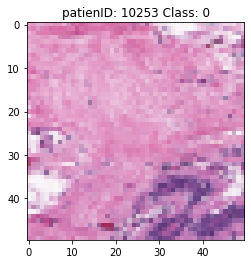

In [86]:
img_sample = imread(img_list[0][0])
plt.title(f'patienID: {t[1]} Class: {t[2]}')
plt.imshow(img_sample)

In [87]:
imgname = test[0][0].split('\\')[3]
imgname

'10253_idx5_x1001_y1001_class0.png'

In [88]:
img_sample

array([[[226, 164, 206],
        [224, 154, 196],
        [225, 175, 211],
        ...,
        [240, 221, 237],
        [232, 184, 214],
        [243, 213, 235]],

       [[217, 142, 188],
        [221, 130, 179],
        [224, 150, 196],
        ...,
        [227, 170, 204],
        [229, 180, 215],
        [236, 212, 232]],

       [[237, 178, 212],
        [229, 157, 199],
        [218, 125, 175],
        ...,
        [221, 184, 217],
        [190, 153, 193],
        [227, 164, 208]],

       ...,

       [[217, 145, 192],
        [214, 129, 184],
        [212, 129, 183],
        ...,
        [194, 122, 185],
        [204, 143, 193],
        [189, 129, 188]],

       [[218, 144, 192],
        [213, 128, 185],
        [208, 121, 171],
        ...,
        [136,  79, 145],
        [184, 111, 174],
        [188, 112, 176]],

       [[212, 125, 181],
        [211, 136, 181],
        [220, 162, 206],
        ...,
        [127,  90, 152],
        [213, 167, 202],
        [215, 180, 211]]

In [90]:
img_list[0][:5]

['data_origin\\10253\\0\\10253_idx5_x1001_y1001_class0.png',
 'data_origin\\10253\\0\\10253_idx5_x1001_y1051_class0.png',
 'data_origin\\10253\\0\\10253_idx5_x1001_y1101_class0.png',
 'data_origin\\10253\\0\\10253_idx5_x1001_y1151_class0.png',
 'data_origin\\10253\\0\\10253_idx5_x1001_y1201_class0.png']

In [76]:
for patient in img_list[2:100]:
    for each_img in patient:
        img = imread(each_img)
        p = each_img.split('\\')
        if p[2] == '0':
            imsave(os.path.join('0', p[3]), img)
        else:
            imsave(os.path.join('1', p[3]), img)

<ipython-input-76-3aa08ce3d198>:6: UserWarning: 0\10260_idx5_x251_y1301_class0.png is a low contrast image
  imsave(os.path.join('0', p[3]), img)
<ipython-input-76-3aa08ce3d198>:6: UserWarning: 0\10268_idx5_x3751_y2251_class0.png is a low contrast image
  imsave(os.path.join('0', p[3]), img)
<ipython-input-76-3aa08ce3d198>:6: UserWarning: 0\10279_idx5_x2501_y2501_class0.png is a low contrast image
  imsave(os.path.join('0', p[3]), img)
<ipython-input-76-3aa08ce3d198>:6: UserWarning: 0\10282_idx5_x1951_y1701_class0.png is a low contrast image
  imsave(os.path.join('0', p[3]), img)
<ipython-input-76-3aa08ce3d198>:6: UserWarning: 0\10282_idx5_x2001_y1701_class0.png is a low contrast image
  imsave(os.path.join('0', p[3]), img)
<ipython-input-76-3aa08ce3d198>:6: UserWarning: 0\10282_idx5_x2051_y1701_class0.png is a low contrast image
  imsave(os.path.join('0', p[3]), img)
<ipython-input-76-3aa08ce3d198>:6: UserWarning: 0\10282_idx5_x2451_y1651_class0.png is a low contrast image
  imsave(os

In [93]:
# total image number for class 0 and 1
nums_0 = len(list(glob.glob('0/*')))
nums_1 = len(list(glob.glob('1/*')))
nums_0, nums_1

(75552, 30735)

In [97]:
30735 / (75552+30735)

0.2891698890739225

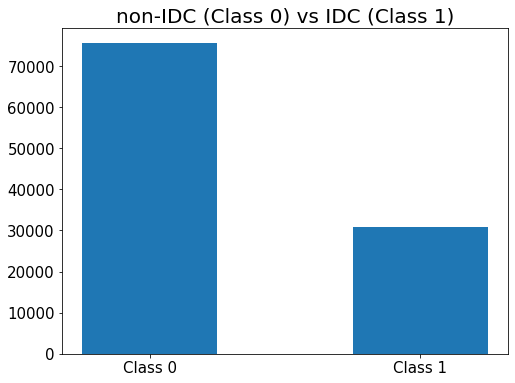

In [103]:
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(['Class 0', 'Class 1'], [nums_0, nums_1], width=0.5)
ax.set_title('non-IDC (Class 0) vs IDC (Class 1)', fontsize=20)
ax.tick_params(labelsize=15)

Because data classified as IDC (class 1) is approximately 28.9%, this is an unbalanced dataset. However, I have so many images that it's hard to undersample any class. So I will not do anything special to address this imbalance. But I will definately choose F1 score as one of the metrics. 

Now show some examples of Cancerous Patches:

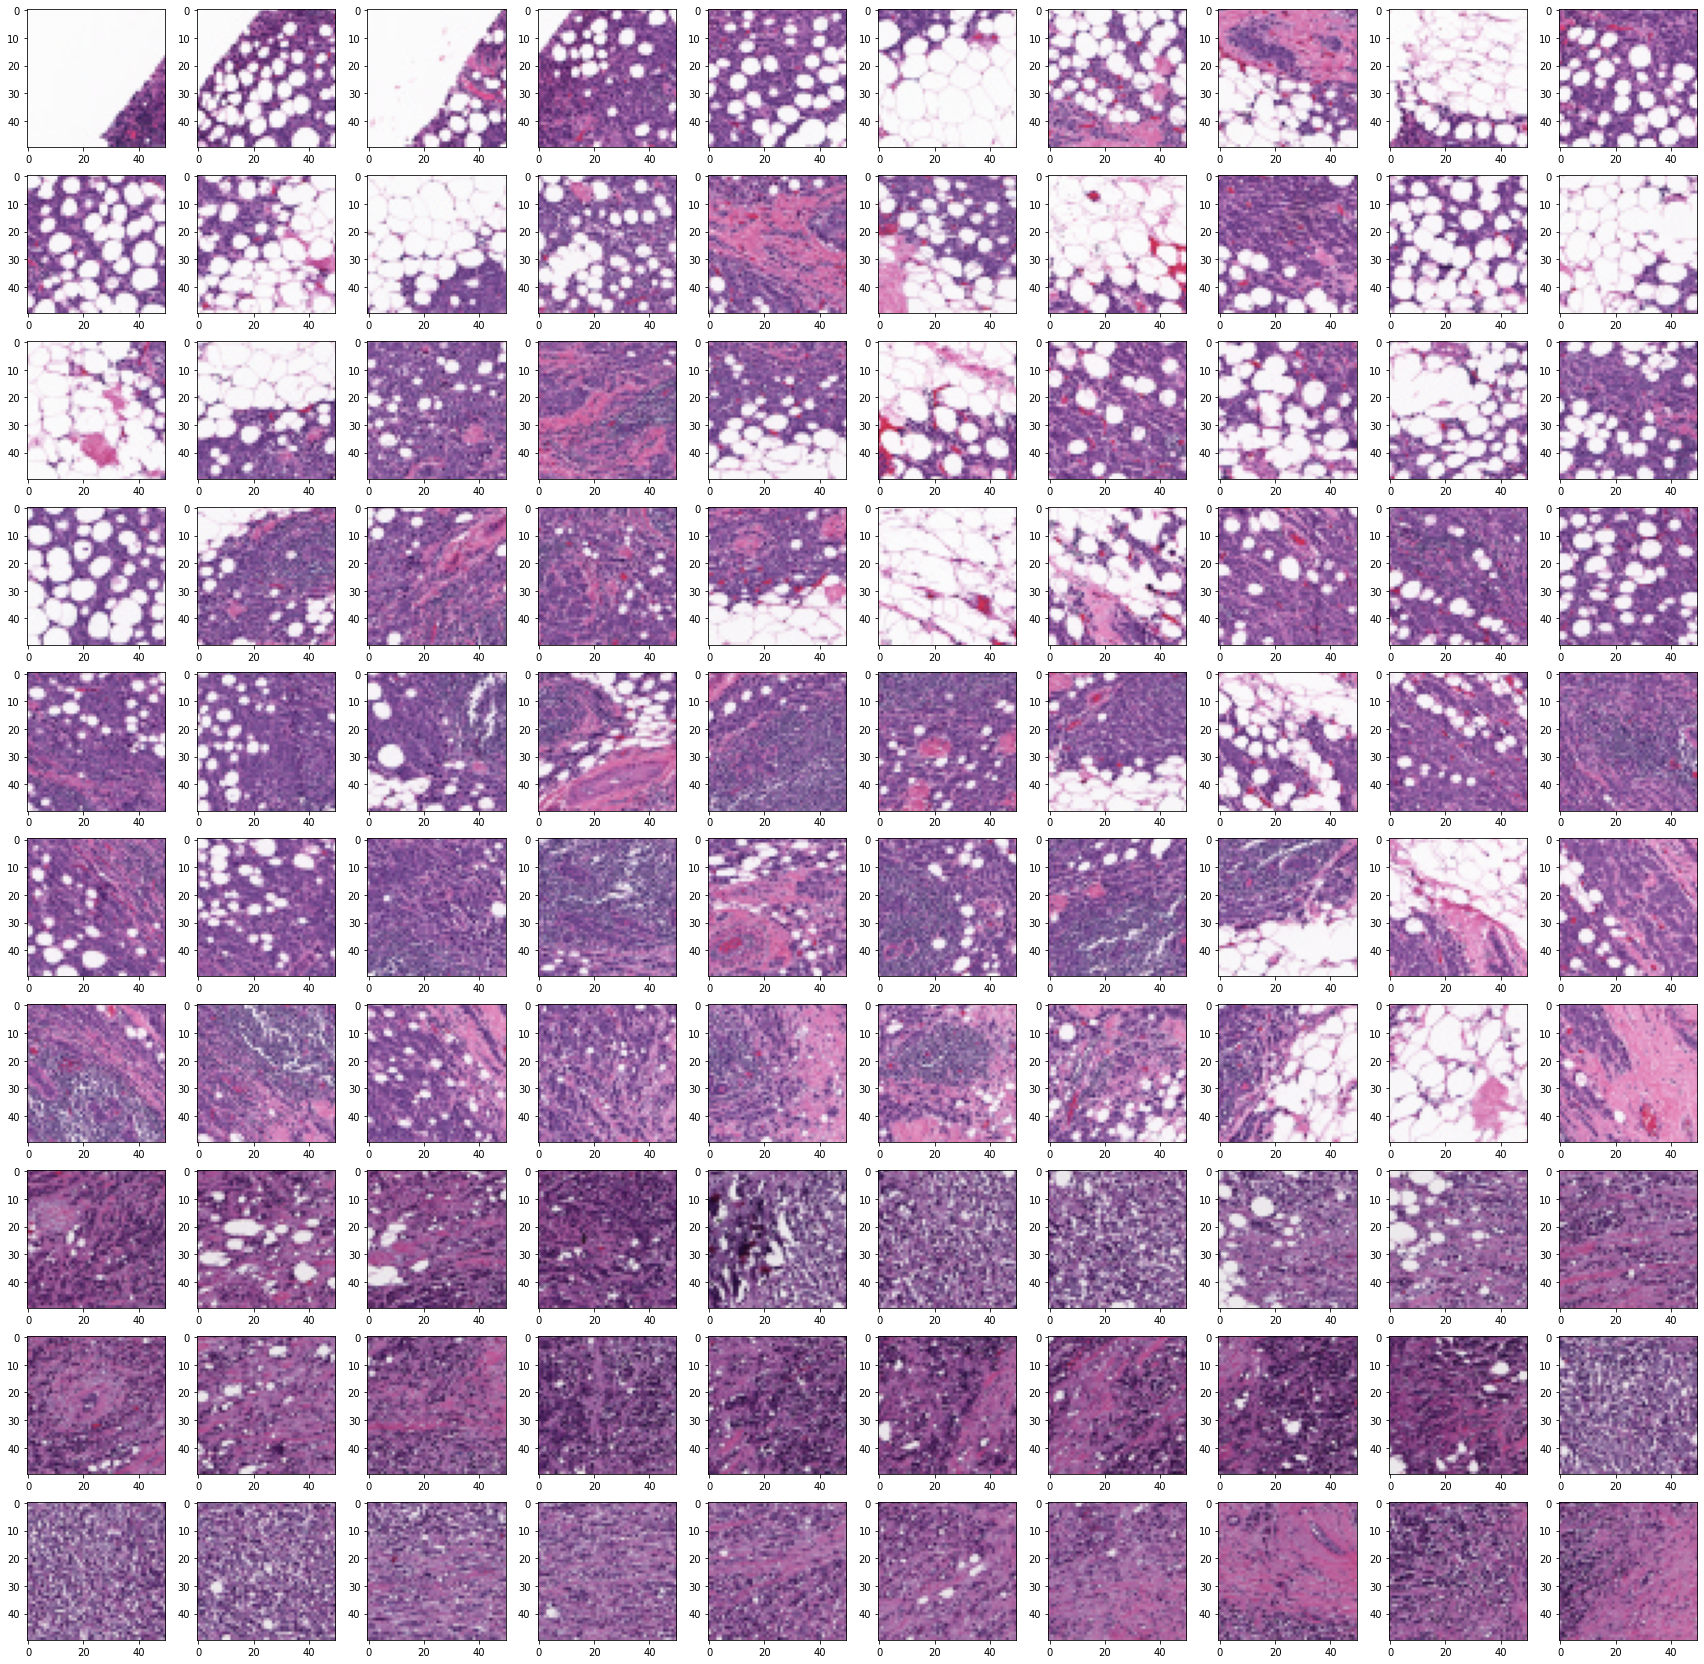

In [131]:
cls1img_list=os.listdir('1')

fig,axs = plt.subplots(10,10,figsize = (30,30))

for i in range(100):
    img = imread('1/'+cls1img_list[i])
    axs.flatten()[i].imshow(img)


Now show some examples of Non-Cancerous Patches:

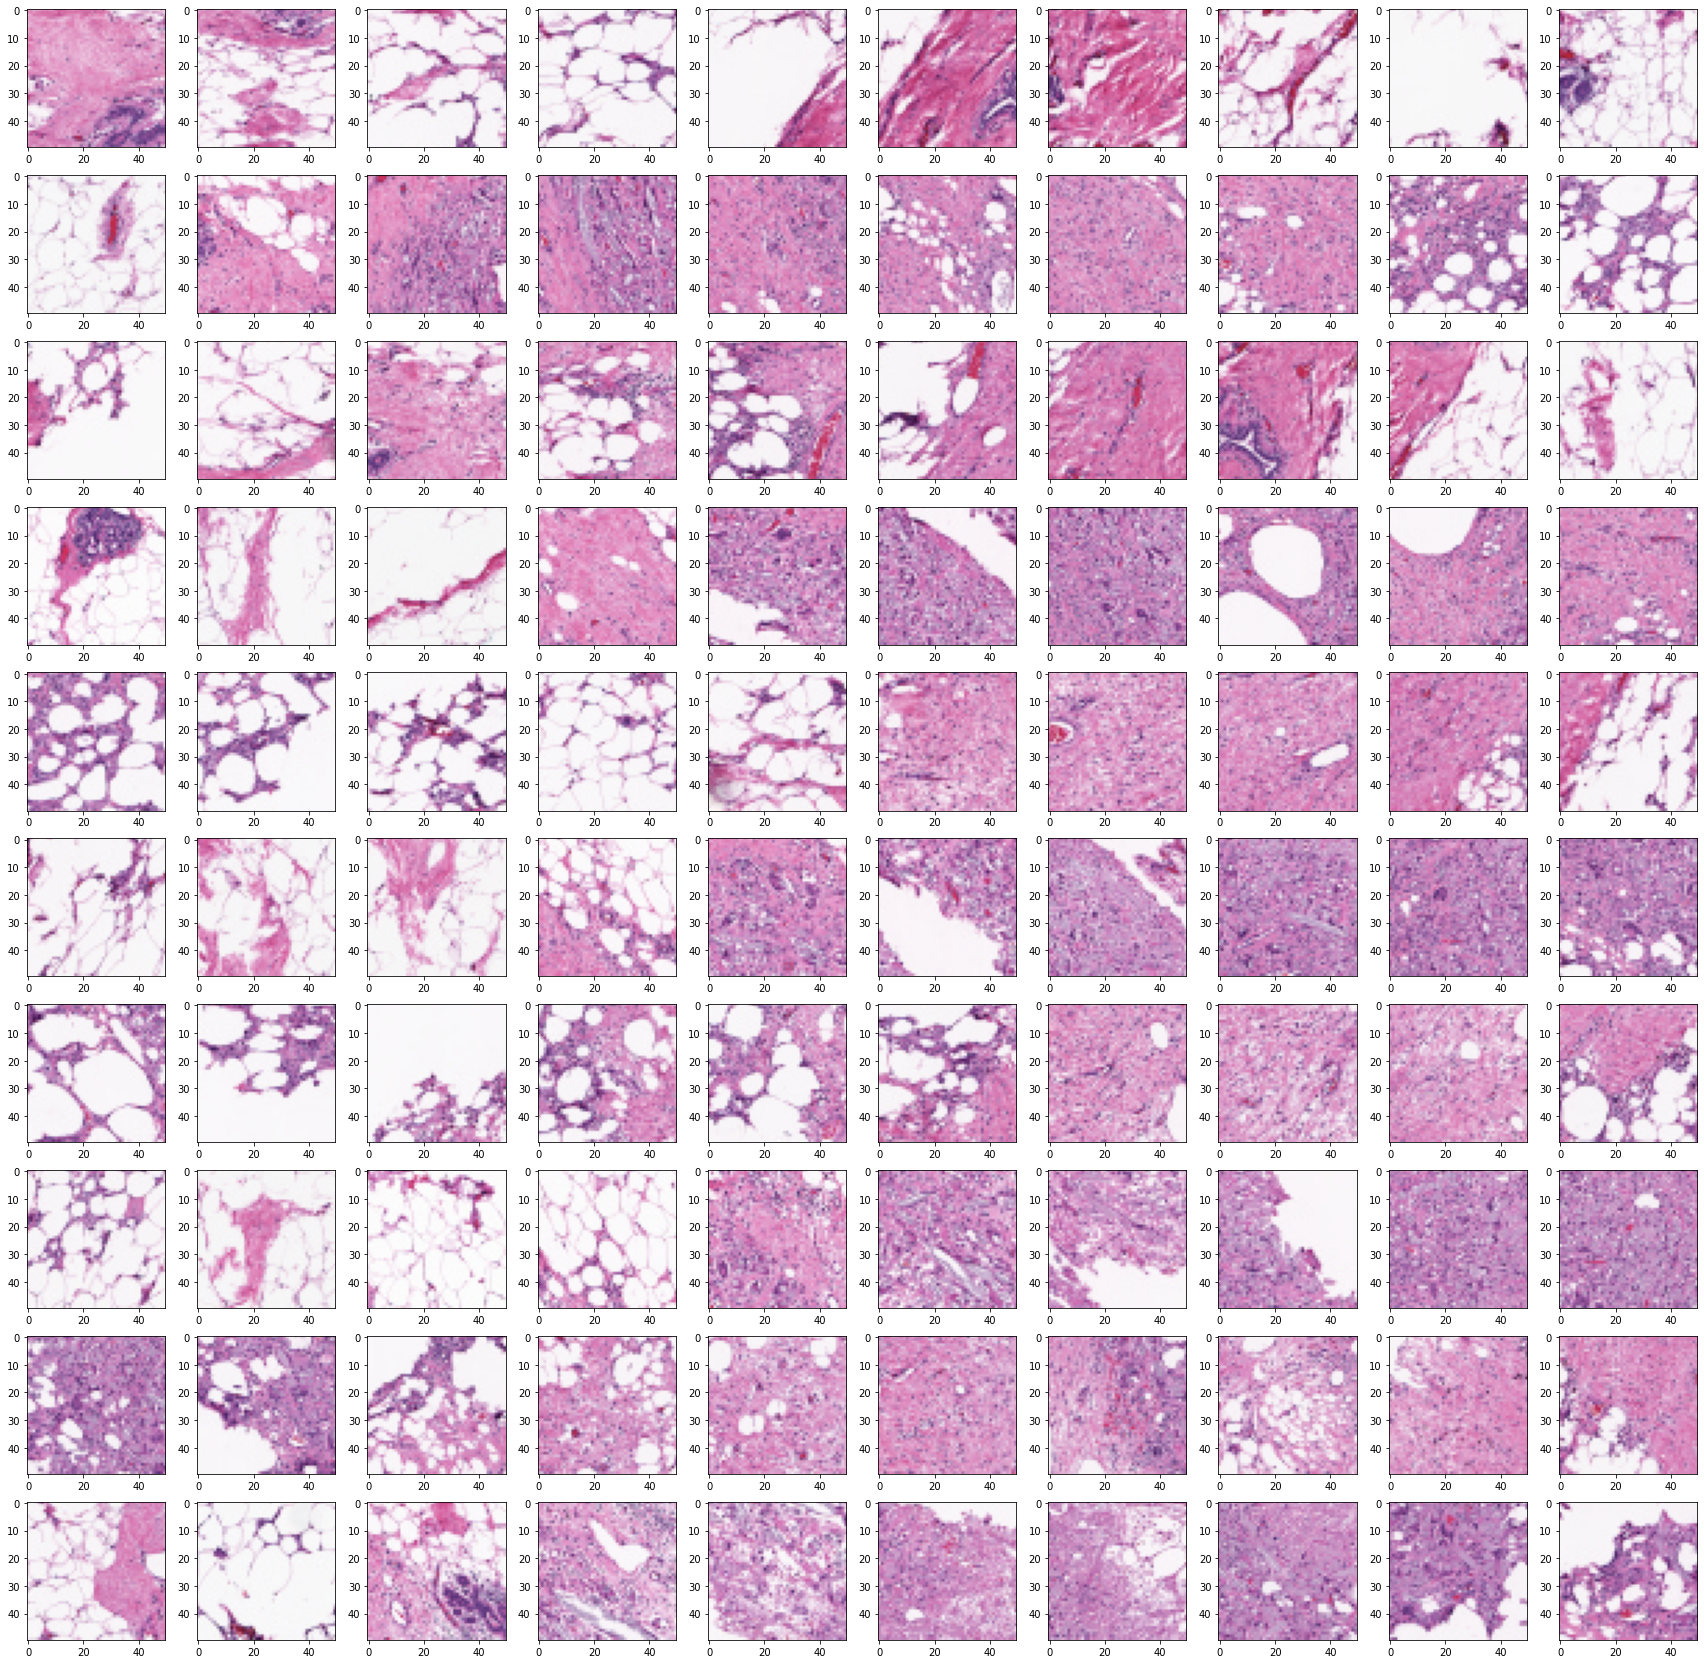

In [132]:
cls0img_list=os.listdir('0')

fig,axs = plt.subplots(10,10,figsize = (30,30))

for i in range(100):
    img = imread('0/'+cls0img_list[i])
    axs.flatten()[i].imshow(img)

Now splitting data into Train, Validate, Test folders:

In [112]:
# # Creating Train / Val / Test folders
root_dir = 'data'
Cls1 = '/1'
Cls0 = '/0'

os.makedirs(root_dir +'/train' + Cls1)
os.makedirs(root_dir +'/train' + Cls0)
os.makedirs(root_dir +'/val' + Cls1)
os.makedirs(root_dir +'/val' + Cls0)
os.makedirs(root_dir +'/test' + Cls1)
os.makedirs(root_dir +'/test' + Cls0)


In [114]:
# Creating partitions of the data after shuffeling
# First split Class 1 images

Cls1Names = os.listdir(Cls1[1])
np.random.shuffle(Cls1Names)
train_Names, val_Names, test_Names = np.split(np.array(Cls1Names),
                                                          [int(len(Cls1Names)*0.6), int(len(Cls1Names)*0.8)])

train_Names = [name for name in train_Names.tolist()]
val_Names = [name for name in val_Names.tolist()]
test_Names = [name for name in test_Names.tolist()]

print('Total images: ', len(Cls1Names))
print('Training: ', len(train_Names))
print('Validation: ', len(val_Names))
print('Testing: ', len(test_Names))


Total images:  30735
Training:  18441
Validation:  6147
Testing:  6147


In [119]:
# Copy-pasting images
for name in train_Names:
    shutil.copy(Cls1[1]+'/'+name, "data/train"+Cls1)

for name in val_Names:
    shutil.copy(Cls1[1]+'/'+name, "data/val"+Cls1)

for name in test_Names:
    shutil.copy(Cls1[1]+'/'+name, "data/test"+Cls1)


In [120]:
# Then split Class 0 images
Cls0Names = os.listdir(Cls0[1])
np.random.shuffle(Cls0Names)
train_Names, val_Names, test_Names = np.split(np.array(Cls0Names),
                                                          [int(len(Cls0Names)*0.6), int(len(Cls0Names)*0.8)])

train_Names = [name for name in train_Names.tolist()]
val_Names = [name for name in val_Names.tolist()]
test_Names = [name for name in test_Names.tolist()]

print('Total images: ', len(Cls0Names))
print('Training: ', len(train_Names))
print('Validation: ', len(val_Names))
print('Testing: ', len(test_Names))


Total images:  75552
Training:  45331
Validation:  15110
Testing:  15111


In [124]:
# Copy-pasting images
for name in train_Names:
    shutil.copy(Cls0[1]+'/'+name, "data/train"+Cls0)

for name in val_Names:
    shutil.copy(Cls0[1]+'/'+name, "data/val"+Cls0)

for name in test_Names:
    shutil.copy(Cls0[1]+'/'+name, "data/test"+Cls0)

In [4]:
def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(50, 50, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='valid'))

    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy', 'AUC', 'Precision', 'Recall'])
    
    return model

model = build_model()


In [5]:
batch_size = 128

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip = True,
    width_shift_range = 0.2,
    height_shift_range = 0.2) 

train_generator = train_datagen.flow_from_directory(
        'data/train',  # this is the target directory
        target_size=(50, 50),  # all images will be resized to 150x150
        batch_size=batch_size,
        seed=1,
        class_mode='binary')

Found 63772 images belonging to 2 classes.


In [164]:
# Store the data in X_train, y_train variables by iterating over the batches
train_generator.reset()
X_train, y_train = next(train_generator)
for i in tqdm(range(len(train_generator)-1)): #1st batch is already fetched before the for loop
    img, label = next(train_generator)
    X_train = np.append(X_train, img, axis=0 )
    y_train = np.append(y_train, label, axis=0)
print(X_train.shape, y_train.shape)

100%|██████████████████████████████████████████████████████████████████████████████| 1992/1992 [31:19<00:00,  1.06it/s]


(63772, 50, 50, 3) (63772,)


In [7]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
        'data/val',
        target_size=(50, 50),
        batch_size=batch_size,
        seed=1,
        class_mode='binary')
print(len(validation_generator))


Found 21257 images belonging to 2 classes.
167


In [158]:
# Store the data in X_val, y_val variables by iterating over the batches
validation_generator.reset()
X_val, y_val = next(validation_generator)
for i in tqdm(range(len(validation_generator)-1)): #1st batch is already fetched before the for loop
    img, label = next(train_generator)
    X_val = np.append(X_val, img, axis=0 )
    y_val = np.append(y_val, label, axis=0)
print(X_val.shape, y_val.shape)

100%|████████████████████████████████████████████████████████████████████████████████| 664/664 [06:55<00:00,  1.60it/s]

(21280, 50, 50, 3) (21280,)


In [ ]:
history = model.fit_generator(
    train_generator,
    #steps_per_epoch=180 // batch_size,
    epochs=30,
    validation_data=validation_generator)
    #validation_steps=20 // batch_size)

# model.save_weights('first_try.h5')


C:\Users\Owner\PyMOL\envs\py3.8\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
473/499 [===========================>..] - ETA: 1:19 - loss: 0.5113 - accuracy: 0.7502 - auc: 0.7612 - precision: 0.6023 - recall: 0.3270

In [142]:
score = model.evaluate(validation_generator, verbose=0)
print('Test score:', score[0])
print('Test accuracy, AUC, Precision, Recall: ', score[1], score[2], score[3], score[4])

Test score: 0.4561994969844818
Test accuracy, AUC, Precision, Recall:  0.7899985909461975 0.8357595801353455 0.7312448620796204 0.4328940808773041


use image size 30x30 and 50x50, I got better accuracy scores and AUC, and speed is not very different, so I will go with 50x50.

In [2]:
model.summary()

NameError: name 'model' is not defined

In [ ]:
import matplotlib.pyplot as plt 
[plt.plot(history.history[i]) for i in history.history.keys()]

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
y_pred = model.predict_classes(X_scaled_test)
y_pred

In [ ]:
target_name = ['benign','malignant']
classification_report(y_true=y_test , y_pred=y_pred , output_dict=True , target_names= target_name )